In [15]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

# %run f2f_utility.py

Toggle code

In [16]:
dataset_name = "W19_only"
df_list = []
%run f2f_header.py {dataset_name} {df_list}

Toggle code

In [17]:
BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
# f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip')


generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'

In [ ]:
BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
# f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip')


generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'

In [32]:
generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]

def run_ge_regression(ge,target_var,demo_var_only=True,min_features=10,
                      harmonised_only=False,drop_vars = [],get_predictions=False,dependence_plots=False,
                     harm_vars = ["wt","age","housing_det",
#                                   "inc_det","inc",
                 #,"bloc_complete"
#                  'gender', 
                                  'gender_complete', 'age_left_education',
#            'age_left_education_2', 
                                  'age_left_education_3', 'anyQuals',
           'rsa_or_city_and_guilds', 'overseas_other_postschl', 'overseas_degree',
           'other_academic_vocational', 'other_tech_business',
           'higher_onc_ond_bec_tec', 'ordinary_gen_onc_ond_bec_tec',
           'trade_appenticeship', 'nursing', 'teachers_training',
           'city_and_guilds_cert_part1', 'city_and_guilds_full_tech',
           'city_and_guilds_advanced_final', 'city_and_guilds_craft_ordinary',
           'rsa_other_commercial', 'school_cert_or_matric',
           'uni_cnaa_degree_or_diploma', 'os_schl_leav_qual',
           'a_level_scot_higher', 'cse_grade_1_scot_lower', 'cse_grade_2_5',
           'professional_qualification', 'spec_qual_gained_at_work',
           'other_qualification', 'highest_qualification', 'nvq_sqv_l1',
           'nvq_sqv_l2', 'nvq_sqv_l3', 'nvq_sqv_l4', 'nvq_sqv_l5', 
           'att_university', 'att_commercial_training',
           'att_polytech_or_techcollege', 'att_night_school',
           'att_non_voc_training', 'att_other', 'att_art_school',
           'att_college_of_commerce', 'att_teacher_training',
           'att_trade_military_apprent', 'att_tech_college_teacher_nursing',
           'att_tech_or_occ_training', 'att_summer_schl_corresp_courses',
           'att_NoFE', 'att_forces_training', 'school_type', 'school_selective',
           'school_fees', 'school_fees_when', 'school_where', 'school_type_2','inc_norm_wt',
            'ec_left_right_complete','soc_lib_auth_complete']):

    target_var = target_var
    harm_vars = harm_vars + [target_var]
    target_var_replace_dict = {}
    target_var_drop_list = []
    target_var_title_pair = ["Lower Income","Higher Income"]
    var_stub = target_var
    min_features = min_features
    drop_vars = drop_vars
    drop_std_thresh = 0

    alg = get_xgboost_alg(classification_problem=False)
    demo_var_only=demo_var_only
    dependence_plots=dependence_plots

    # find variables with no coverage/variation in focal instances (mask)
    df_pred = prep_df_only(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
           var_stub,harm_vars,min_features,dependence_plots=dependence_plots,drop_vars=drop_vars,demo_var_only=demo_var_only,
                           harmonised_only=harmonised_only,
                          )
    if get_predictions:
        mask = df_pred[target_var].isnull()
    else:
        mask = df_pred[target_var].notnull()
    stds = df_pred[mask].std()
    drop_vars = drop_vars + list(stds[stds.isnull()].index)+list(stds[stds<=drop_std_thresh].index)
    drop_vars = [x for x in drop_vars if x not in ["wt",var_stub]]

    (explainer, shap_values, train_columns, train_index, alg,output_subfolder) = prep_df(ge,target_var,target_var_replace_dict,
                                                                                         target_var_drop_list,target_var_title_pair,
           var_stub,harm_vars,min_features,dependence_plots=dependence_plots,drop_vars=drop_vars,demo_var_only=demo_var_only,alg=alg,
                                                                                        harmonised_only=harmonised_only)

    if get_predictions:
        # setup df back up
        df_pred = prep_df_only(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
               var_stub,harm_vars,min_features,dependence_plots=dependence_plots,drop_vars=drop_vars,demo_var_only=demo_var_only,
                              harmonised_only=harmonised_only)
        # # use fitted algorithm to predict values
        predictions = pd.Series(alg.predict(df_pred[train_columns]),index=df_pred[target_var].index)#.round()
        return predictions,shap_values,train_columns
        # inc_pred = pd.Series(alg.predict(df_pred[train_columns]),index=inc.index).round()
        # income_var_df_sm.loc[income_var_df_sm[ge].isnull(),ge] = pd.Series(inc_pred,index=income_var_df_sm[ge].index).apply(round)[income_var_df_sm[ge].isnull()]

In [18]:
# Ordinary people get their fair share of the nation’s wealth
# There is one law for the rich and one for the poor
# There is no need for strong Trade Unions to protect workers’ rights
# Private enterprise is the best way to solve Britain’s economic problems
# ordinary, rich, strongtu, enterprise

# Young people don’t have enough respect for traditional values
# Censorship is necessary to uphold moral values
# We should be tolerant of those who lead unconventional lifestyles
# For some crime the death penalty is the most appropriate sentence
# People who break the law should be given stiffer sentences
# respect, censorship, unconvent, death, 

In [19]:
# People in Britain should be more tolerant of those who lead unconventional lives
unconvent = {"2019":"f01_10","2017":"f01_10","2015":"f01_10","2010":"cq17_8",
             "2005":"cq16h","2001":"cq19h","1997":"tolerant","1992":"v205e"}
# For some crimes, the death penalty is the most appropriate sentence
death = {"2019":"f01_11","2017":"f01_11",
         #"2015":"", it really missing!
         # death penalty never justified
         "2010":"cq13_1", "2005":"cq12a","2001":"cq15a",
         # great britain should bring back death penalty
         "1997":"deathpen","1992":"v47d",
         # agree/disagree: death penalty for some crimes
         "1987":"v121n",
         # agree/disagree: death penalty for some crimes
         "1983":"q42c",
         # gov should bring back death penalty-q38f
         "1979":"m000134",
#    'v224': 'DEATH PENALTY POLICY',
#    'v225': 'DEATH PENALTY POLICY  66',
#    'v226': 'DEATH PENALTY POLICY  70',
        }

# Ordinary working people get their fair share of the nation's wealth
ordinary = {"2019":"f01_1","2017":"f01_1","2015":"f01_1","2010":"cq17_1",
             "2005":"cq16a","2001":"cq19a","1997":"fairshar","1992":"v204a"}

# There is one law for the rich and one for the poor
rich = {"2019":"f01_2","2017":"f01_2","2015":"f01_2",
        "2010":"cq17_2",
        "2005":"cq16b","2001":"cq19b","1997":"richlaw","1992":"v204b",
        "1987":"v121g"}
# Young people today don't have enough respect for traditional British values
respect = {"2019":"f01_3","2017":"f01_3","2015":"f01_3",
           #young people not enough respect values
        "2010":"cq17_5","2005":"cq16e","2001":"cq19e",
        "1997":"tradvals","1992":"v204d",
        "1987":"v121k"}
# Censorship of films and magazines is necessary to uphold moral standards
censorship = {"2019":"f01_4","2017":"f01_4","2015":"f01_4",
        "2010":"cq17_6",
        "2005":"cq16f","2001":"cq19f","1997":"censor","1992":"v204e",
        "1987":"v121q"}
# There is no need for strong trade unions to protect working conditions and wages
strongtu = {"2019":"f01_5","2017":"f01_5","2015":"f01_5",
        "2010":"cq17_3",
        "2005":"cq16c","2001":"cq19c","1997":"tuntneed","1992":"v204f",
        }

# Private enterprise is the best way to solve Britain's economic problems
enterprise = {"2019":"f01_6","2017":"f01_6","2015":"f01_6",
        "2010":"cq17_4",
        "2005":"cq16d","2001":"cq19d","1997":"privent","1992":"v204g",
        }
#Big business has too much power?
bigbusiness = {"2019":"w12","2017":"w12","2015":"w12",
        "2010":"cq19",
        "2005":"cq18","2001":"cq25","1997":"buspower","1992":"v51b",
        "1987":"v111","1983":"q38b","1979":"m491180",
        "1974_oct":"oct491"}
# 'v248': 'BIG BUSINESS POWER  1963',
#    'v249': 'BIG BUSINESS POWER  1964',
#    'v250': 'BIG BUSINESS POWER  1966',
#    'v251': 'BIG BUSINESS POWER  1970',

# People who break the law should be given stiffer sentences
toughlaw = {"2019":"f01_12","2017":"f01_12",
            #"2015":"f01_12",
           #long prison sentences if break law 
        "2010":"cq13_4",
            #lawbreakers longer prison sentences
        "2005":"cq12d","2001":"cq15d",
            #lawbreakers should get stiffer sentences? q458
        "1997":"stifsent",
            #lawbreakers should get stiffer sentences q47e
        "1992":"v47e",
            #law and order: respondent's view
#         "1987":"v39a",
#         "1983":"q41a",
            #importance in vote: law & order-q21c
#         "1979":"m000075",
            #gone too far-law breakers
#         "1974_oct":"oct451"
           }


In [20]:
f2f_harmonised["unconventional"] = np.nan

ge="2019"
BES_df_list[ge][unconvent[ge]].value_counts().sort_index()
replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4}
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "unconventional"] = BES_df_list[ge][unconvent[ge]].replace(replace_dict)
BES_df_list[ge][unconvent[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()



ge="2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "unconventional"] = BES_df_list[ge][unconvent[ge]].replace(replace_dict)
BES_df_list[ge][unconvent[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2015"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "unconventional"] = BES_df_list[ge][unconvent[ge]].replace(replace_dict)
BES_df_list[ge][unconvent[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4,
               "not stated":np.nan,"agree strongly":4,"agree":3,"neither agree nor disagree":2,'disagree':1,'disagree strongly':0,
               9:np.nan,99:np.nan,
               'not ascertainable':np.nan,'no mailback':np.nan,
               "strongly agree":4,"strongly disagree":0,
               'no self-completion':np.nan,"can't   choose":np.nan,'not     answered':np.nan,'neither':2,
               'no self-completn':np.nan}

ge="2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "unconventional"] = BES_df_list[ge][unconvent[ge]].replace(replace_dict)
BES_df_list[ge][unconvent[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "unconventional"] = (5-BES_df_list[ge][unconvent[ge]].replace(replace_dict))
(5-BES_df_list[ge][unconvent[ge]].replace(replace_dict)).value_counts(dropna=False).sort_index()
# not so clear direction!

ge="2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "unconventional"] = BES_df_list[ge][unconvent[ge]].replace(replace_dict)
BES_df_list[ge][unconvent[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "unconventional"] = BES_df_list[ge][unconvent[ge]].replace(replace_dict)
BES_df_list[ge][unconvent[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "unconventional"] = BES_df_list[ge][unconvent[ge]].replace(replace_dict)
# BES_df_list[ge][unconvent[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()



In [21]:
f2f_harmonised["ordinary"] = np.nan

# Ordinary working people get their fair share of the nation's wealth
replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4,
               "not stated":np.nan,"agree strongly":4,"agree":3,"neither agree nor disagree":2,'disagree':1,'disagree strongly':0,
               9:np.nan,99:np.nan,
               'not ascertainable':np.nan,'no mailback':np.nan,
               "strongly agree":4,"strongly disagree":0,
               'no self-completion':np.nan,"can't   choose":np.nan,'not     answered':np.nan,'neither':2,
               'no self-completn':np.nan,"can't choose":np.nan}

ge="2019"
# BES_df_list[ge][ordinary[ge]].value_counts().sort_index()
# replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4}
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "ordinary"] = BES_df_list[ge][ordinary[ge]].replace(replace_dict)
BES_df_list[ge][ordinary[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()



ge="2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "ordinary"] = BES_df_list[ge][ordinary[ge]].replace(replace_dict)
BES_df_list[ge][ordinary[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2015"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "ordinary"] = BES_df_list[ge][ordinary[ge]].replace(replace_dict)
BES_df_list[ge][ordinary[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

# replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4,
#                "not stated":np.nan,"agree strongly":4,"agree":3,"neither agree nor disagree":2,'disagree':1,'disagree strongly':0,
#                9:np.nan,99:np.nan,
#                'not ascertainable':np.nan,'no mailback':np.nan,
#                "strongly agree":4,"strongly disagree":0,
#                'no self-completion':np.nan,"can't   choose":np.nan,'not     answered':np.nan,'neither':2,
#                'no self-completn':np.nan}

ge="2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "ordinary"] = BES_df_list[ge][ordinary[ge]].replace(replace_dict)
BES_df_list[ge][ordinary[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "ordinary"] = (5-BES_df_list[ge][ordinary[ge]].replace(replace_dict))
(5-BES_df_list[ge][ordinary[ge]].replace(replace_dict)).value_counts(dropna=False).sort_index()
# # not so clear direction!

ge="2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "ordinary"] = BES_df_list[ge][ordinary[ge]].replace(replace_dict)
BES_df_list[ge][ordinary[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "ordinary"] = BES_df_list[ge][ordinary[ge]].replace(replace_dict)
BES_df_list[ge][ordinary[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "ordinary"] = BES_df_list[ge][ordinary[ge]].replace(replace_dict)
# BES_df_list[ge][ordinary[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

#87:agree/disagree: workers don't get fair wage
# 74_oct: resp wage fair

In [22]:
# There is one law for the rich and one for the poor
f2f_harmonised["rich"] = np.nan
replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4,
               "not stated":np.nan,"agree strongly":4,"agree":3,"neither agree nor disagree":2,'disagree':1,'disagree strongly':0,
               9:np.nan,99:np.nan,
               'not ascertainable':np.nan,'no mailback':np.nan,
               "strongly agree":4,"strongly disagree":0,
               'no self-completion':np.nan,"can't   choose":np.nan,'not     answered':np.nan,'neither':2,
               'no self-completn':np.nan,"can't choose":np.nan,
               "neutral":2,"not answered":np.nan,"dont know":np.nan}

ge="2019"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "rich"] = BES_df_list[ge][rich[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "rich"] = BES_df_list[ge][rich[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2015"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "rich"] = BES_df_list[ge][rich[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "rich"] = BES_df_list[ge][rich[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "rich"] = (5-BES_df_list[ge][rich[ge]].replace(replace_dict))
(5-BES_df_list[ge][rich[ge]].replace(replace_dict)).value_counts(dropna=False).sort_index()
# # # not so clear direction!

ge="2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "rich"] = BES_df_list[ge][rich[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "rich"] = BES_df_list[ge][rich[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "rich"] = BES_df_list[ge][rich[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1987"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "rich"] = BES_df_list[ge][rich[ge]].replace(replace_dict)
# BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()


In [23]:
# Young people today don't have enough respect for traditional British values
f2f_harmonised["respect"] = np.nan
replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4,
               "not stated":np.nan,"agree strongly":4,"agree":3,"neither agree nor disagree":2,'disagree':1,'disagree strongly':0,
               9:np.nan,99:np.nan,
               'not ascertainable':np.nan,'no mailback':np.nan,
               "strongly agree":4,"strongly disagree":0,
               'no self-completion':np.nan,"can't   choose":np.nan,'not     answered':np.nan,'neither':2,
               'no self-completn':np.nan,"can't choose":np.nan,
               "neutral":2,"not answered":np.nan,"dont know":np.nan}

ge="2019"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "respect"] = BES_df_list[ge][respect[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "respect"] = BES_df_list[ge][respect[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2015"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "respect"] = BES_df_list[ge][respect[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "respect"] = BES_df_list[ge][respect[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "respect"] = (5-BES_df_list[ge][respect[ge]].replace(replace_dict))
(5-BES_df_list[ge][rich[ge]].replace(replace_dict)).value_counts(dropna=False).sort_index()
# # # # not so clear direction!

ge="2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "respect"] = BES_df_list[ge][respect[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "respect"] = BES_df_list[ge][respect[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "respect"] = BES_df_list[ge][respect[ge]].replace(replace_dict)
BES_df_list[ge][rich[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1987"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "respect"] = BES_df_list[ge][respect[ge]].replace(replace_dict)
# BES_df_list[ge][respect[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()


In [24]:
# Censorship of films and magazines is necessary to uphold moral standards
f2f_harmonised["censorship"] = np.nan
replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4,
               "not stated":np.nan,"agree strongly":4,"agree":3,"neither agree nor disagree":2,'disagree':1,'disagree strongly':0,
               9:np.nan,99:np.nan,
               'not ascertainable':np.nan,'no mailback':np.nan,
               "strongly agree":4,"strongly disagree":0,
               'no self-completion':np.nan,"can't   choose":np.nan,'not     answered':np.nan,'neither':2,
               'no self-completn':np.nan,"can't choose":np.nan,
               "neutral":2,"not answered":np.nan,"dont know":np.nan}

ge="2019"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "censorship"] = BES_df_list[ge][censorship[ge]].replace(replace_dict)
BES_df_list[ge][censorship[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "censorship"] = BES_df_list[ge][censorship[ge]].replace(replace_dict)
BES_df_list[ge][censorship[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2015"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "censorship"] = BES_df_list[ge][censorship[ge]].replace(replace_dict)
BES_df_list[ge][censorship[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "censorship"] = BES_df_list[ge][censorship[ge]].replace(replace_dict)
BES_df_list[ge][censorship[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "censorship"] = (5-BES_df_list[ge][censorship[ge]].replace(replace_dict))
(5-BES_df_list[ge][censorship[ge]].replace(replace_dict)).value_counts(dropna=False).sort_index()
# # # # # not so clear direction!

ge="2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "censorship"] = BES_df_list[ge][censorship[ge]].replace(replace_dict)
BES_df_list[ge][censorship[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "censorship"] = BES_df_list[ge][censorship[ge]].replace(replace_dict)
BES_df_list[ge][censorship[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "censorship"] = BES_df_list[ge][censorship[ge]].replace(replace_dict)
BES_df_list[ge][censorship[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1987"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "censorship"] = BES_df_list[ge][censorship[ge]].replace(replace_dict)
# BES_df_list[ge][censorship[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()


In [25]:
# There is no need for strong trade unions to protect working conditions and wages
f2f_harmonised["strongtu"] = np.nan
replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4,
               "not stated":np.nan,"agree strongly":4,"agree":3,"neither agree nor disagree":2,'disagree':1,'disagree strongly':0,
               9:np.nan,99:np.nan,
               'not ascertainable':np.nan,'no mailback':np.nan,
               "strongly agree":4,"strongly disagree":0,
               'no self-completion':np.nan,"can't   choose":np.nan,'not     answered':np.nan,'neither':2,
               'no self-completn':np.nan,"can't choose":np.nan,
               "neutral":2,"not answered":np.nan,"dont know":np.nan}

ge="2019"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "strongtu"] = BES_df_list[ge][strongtu[ge]].replace(replace_dict)
BES_df_list[ge][strongtu[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "strongtu"] = BES_df_list[ge][strongtu[ge]].replace(replace_dict)
BES_df_list[ge][strongtu[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2015"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "strongtu"] = BES_df_list[ge][strongtu[ge]].replace(replace_dict)
BES_df_list[ge][strongtu[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "strongtu"] = BES_df_list[ge][strongtu[ge]].replace(replace_dict)
BES_df_list[ge][strongtu[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "strongtu"] = (5-BES_df_list[ge][strongtu[ge]].replace(replace_dict))
(5-BES_df_list[ge][strongtu[ge]].replace(replace_dict)).value_counts(dropna=False).sort_index()
# # # # # # not so clear direction!

ge="2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "strongtu"] = BES_df_list[ge][strongtu[ge]].replace(replace_dict)
BES_df_list[ge][strongtu[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "strongtu"] = BES_df_list[ge][strongtu[ge]].replace(replace_dict)
BES_df_list[ge][strongtu[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "strongtu"] = BES_df_list[ge][strongtu[ge]].replace(replace_dict)
# BES_df_list[ge][strongtu[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

# ge="1987"
# f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "strongtu"] = BES_df_list[ge][strongtu[ge]].replace(replace_dict)
# BES_df_list[ge][strongtu[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()


In [26]:
# Private enterprise is the best way to solve Britain's economic problems
f2f_harmonised["enterprise"] = np.nan
replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4,
               "not stated":np.nan,"agree strongly":4,"agree":3,"neither agree nor disagree":2,'disagree':1,'disagree strongly':0,
               9:np.nan,99:np.nan,
               'not ascertainable':np.nan,'no mailback':np.nan,
               "strongly agree":4,"strongly disagree":0,
               'no self-completion':np.nan,"can't   choose":np.nan,'not     answered':np.nan,'neither':2,
               'no self-completn':np.nan,"can't choose":np.nan,
               "neutral":2,"not answered":np.nan,"dont know":np.nan}

ge="2019"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "enterprise"] = BES_df_list[ge][enterprise[ge]].replace(replace_dict)
BES_df_list[ge][enterprise[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "enterprise"] = BES_df_list[ge][enterprise[ge]].replace(replace_dict)
BES_df_list[ge][enterprise[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2015"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "enterprise"] = BES_df_list[ge][enterprise[ge]].replace(replace_dict)
BES_df_list[ge][enterprise[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "enterprise"] = BES_df_list[ge][enterprise[ge]].replace(replace_dict)
BES_df_list[ge][enterprise[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "enterprise"] = (5-BES_df_list[ge][enterprise[ge]].replace(replace_dict))
(5-BES_df_list[ge][enterprise[ge]].replace(replace_dict)).value_counts(dropna=False).sort_index()
# # # # # # # not so clear direction!

ge="2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "enterprise"] = BES_df_list[ge][enterprise[ge]].replace(replace_dict)
BES_df_list[ge][enterprise[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "enterprise"] = BES_df_list[ge][enterprise[ge]].replace(replace_dict)
BES_df_list[ge][enterprise[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "enterprise"] = BES_df_list[ge][enterprise[ge]].replace(replace_dict)
# BES_df_list[ge][enterprise[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

# ge="1987"
# f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "enterprise"] = BES_df_list[ge][enterprise[ge]].replace(replace_dict)
# BES_df_list[ge][enterprise[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()


In [27]:
# People who break the law should be given stiffer sentences
f2f_harmonised["toughlaw"] = np.nan
replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4,
               "not stated":np.nan,"agree strongly":4,"agree":3,"neither agree nor disagree":2,'disagree':1,'disagree strongly':0,
               9:np.nan,99:np.nan,
               'not ascertainable':np.nan,'no mailback':np.nan,
               "strongly agree":4,"strongly disagree":0,
               'no self-completion':np.nan,"can't   choose":np.nan,'not     answered':np.nan,'neither':2,
               'no self-completn':np.nan,"can't choose":np.nan,
               "neutral":2,"not answered":np.nan,"dont know":np.nan,
               "not sure either way":2,"don't   know":np.nan
                }

ge="2019"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "toughlaw"] = BES_df_list[ge][toughlaw[ge]].replace(replace_dict)
BES_df_list[ge][toughlaw[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "toughlaw"] = BES_df_list[ge][toughlaw[ge]].replace(replace_dict)
BES_df_list[ge][toughlaw[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

# ge="2015"
# f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "toughlaw"] = BES_df_list[ge][toughlaw[ge]].replace(replace_dict)
# BES_df_list[ge][toughlaw[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "toughlaw"] = BES_df_list[ge][toughlaw[ge]].replace(replace_dict)
BES_df_list[ge][toughlaw[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "toughlaw"] = (5-BES_df_list[ge][toughlaw[ge]].replace(replace_dict))
(5-BES_df_list[ge][toughlaw[ge]].replace(replace_dict)).value_counts(dropna=False).sort_index()
# # # # # # not so clear direction!

ge="2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "toughlaw"] = BES_df_list[ge][toughlaw[ge]].replace(replace_dict)
BES_df_list[ge][toughlaw[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "toughlaw"] = BES_df_list[ge][toughlaw[ge]].replace(replace_dict)
BES_df_list[ge][toughlaw[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "toughlaw"] = BES_df_list[ge][toughlaw[ge]].replace(replace_dict)
# BES_df_list[ge][toughlaw[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

# ge="1987"
# f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "toughlaw"] = BES_df_list[ge][toughlaw[ge]].replace(replace_dict)
# BES_df_list[ge][toughlaw[ge]].replace(replace_dict).value_counts(dropna=False)#.sort_index()


In [28]:
# For some crimes, the death penalty is the most appropriate sentence
f2f_harmonised["death"] = np.nan
replace_dict = {"Not stated":np.nan,"Don't know":np.nan,"Strongly disagree":0,"Disagree":1,"Neither agree nor disagree":2,"Agree":3,"Strongly agree":4,
               "not stated":np.nan,"agree strongly":4,"agree":3,"neither agree nor disagree":2,'disagree':1,'disagree strongly':0,
               9:np.nan,99:np.nan,
               'not ascertainable':np.nan,'no mailback':np.nan,
               "strongly agree":4,"strongly disagree":0,
               'no self-completion':np.nan,"can't   choose":np.nan,'not     answered':np.nan,'neither':2,
               'no self-completn':np.nan,"can't choose":np.nan,
               "neutral":2,"not answered":np.nan,"dont know":np.nan,
               "not sure either way":2,"don't   know":np.nan,
                "v impt shd be done":4,"fairly impt should":3,"doesn't matter":2,"fairly impt shouldnt":1,"v impt should not":0,
                0:np.nan,"dk":np.nan,
                }

ge="2019"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = BES_df_list[ge][death[ge]].replace(replace_dict)
BES_df_list[ge][death[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = BES_df_list[ge][death[ge]].replace(replace_dict)
BES_df_list[ge][death[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

# ge="2015"
# f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = BES_df_list[ge][death[ge]].replace(replace_dict)
# BES_df_list[ge][death[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = (4-BES_df_list[ge][death[ge]].replace(replace_dict))
(4-BES_df_list[ge][death[ge]].replace(replace_dict)).value_counts(dropna=False).sort_index()

ge="2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = (BES_df_list[ge][death[ge]].replace(replace_dict)-1)
(BES_df_list[ge][death[ge]].replace(replace_dict)-1).value_counts(dropna=False).sort_index()
# # # # # # # not so clear direction!

ge="2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = (4-BES_df_list[ge][death[ge]].replace(replace_dict))
(4-BES_df_list[ge][death[ge]].replace(replace_dict)).value_counts(dropna=False).sort_index()

ge="1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = BES_df_list[ge][death[ge]].replace(replace_dict)
BES_df_list[ge][death[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = BES_df_list[ge][death[ge]].replace(replace_dict)
BES_df_list[ge][death[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

ge="1987"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = BES_df_list[ge][death[ge]].replace(replace_dict)
# BES_df_list[ge][death[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()

# ge="1983"
# f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = BES_df_list[ge][death[ge]].replace(replace_dict)
# BES_df_list[ge][death[ge]]#.replace(replace_dict).value_counts(dropna=False)#.sort_index()
## down to agree/disagree binary!
# gov should bring back death penalty-q38f
# ge="1979"
# f2f_harmonised.loc[f2f_harmonised["dataset"]==ge, "death"] = BES_df_list[ge][death[ge]].replace(replace_dict)
# BES_df_list[ge][death[ge]].replace(replace_dict).value_counts(dropna=False).sort_index()


In [29]:
f2f_harmonised["rich"] = 4-f2f_harmonised["rich"]
f2f_harmonised["unconventional"] = 4-f2f_harmonised["unconventional"]

f2f_harmonised["ec_left_right"] = (f2f_harmonised[["ordinary","rich","strongtu","enterprise"]].mean(axis=1)*4)
f2f_harmonised["soc_lib_auth"] = (f2f_harmonised[["respect","censorship","toughlaw","death"]].mean(axis=1)*4)

val_list = ['unconventional', 'ordinary', 'rich',
       'respect', 'censorship', 'strongtu', 'enterprise', 'toughlaw', 'death']

In [30]:
f2f_harmonised["soc_lib_auth_complete"] = f2f_harmonised["soc_lib_auth"]
f2f_harmonised["ec_left_right_complete"] = f2f_harmonised["ec_left_right"]
var_dict = {}

MSE: 4.67, MAE: 1.67, EV: 0.53, R2: 0.52


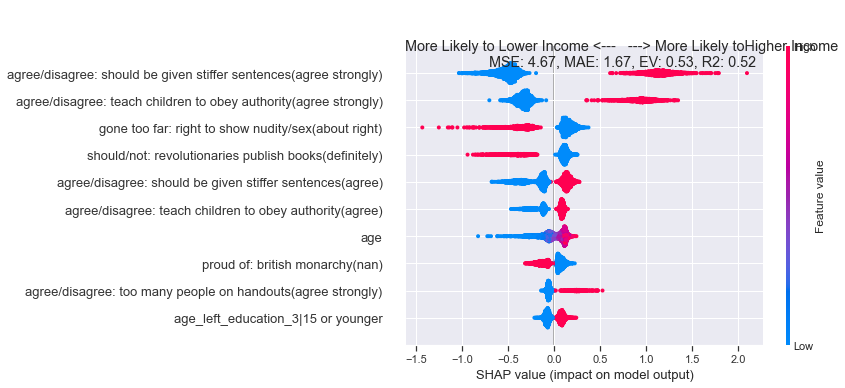

MSE: 12.19, MAE: 2.70, EV: 0.43, R2: 0.43


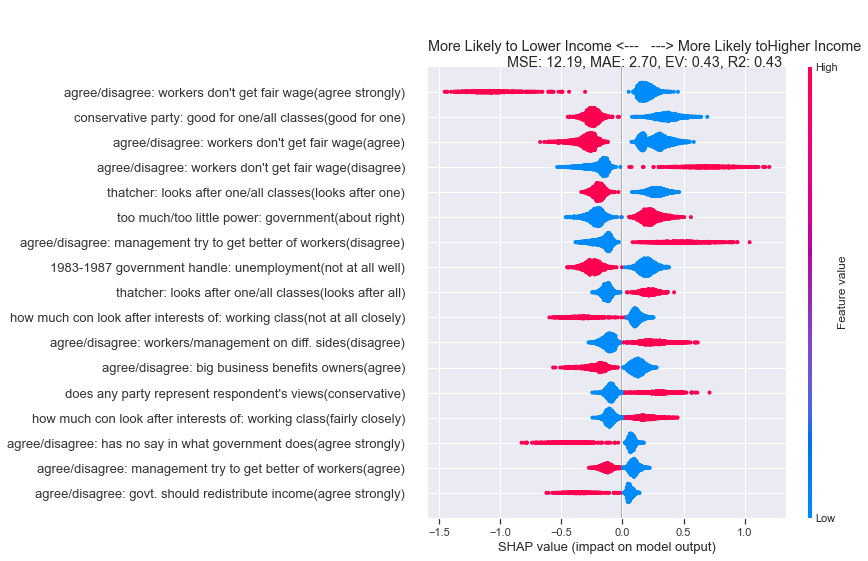

MSE: 5.26, MAE: 1.81, EV: 0.39, R2: 0.39


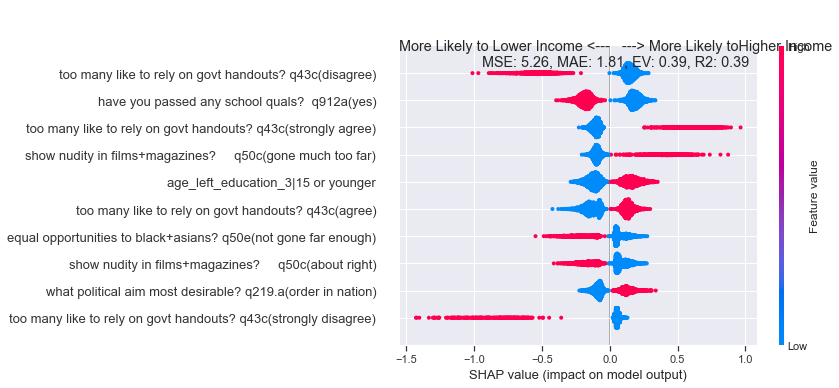

MSE: 3.79, MAE: 1.54, EV: 0.60, R2: 0.60


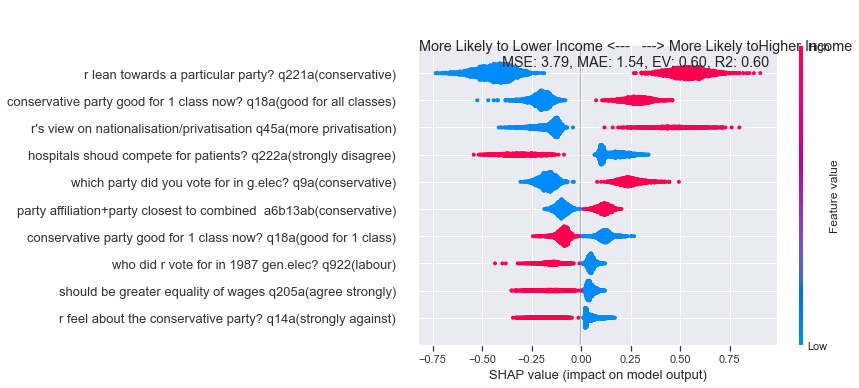

MSE: 4.77, MAE: 1.73, EV: 0.48, R2: 0.48


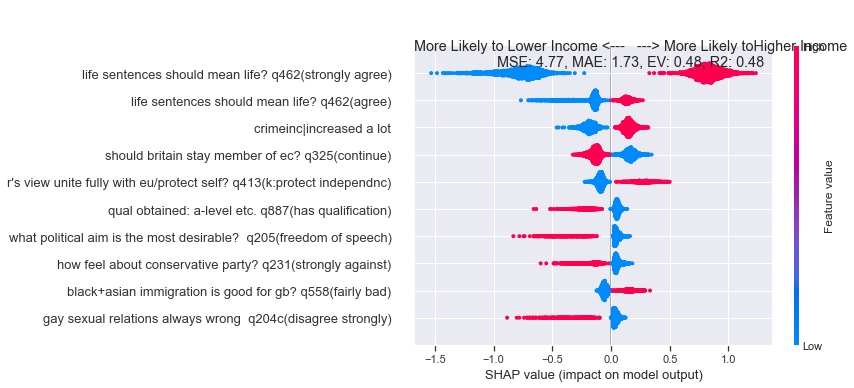

MSE: 1.70, MAE: 0.93, EV: 0.79, R2: 0.79


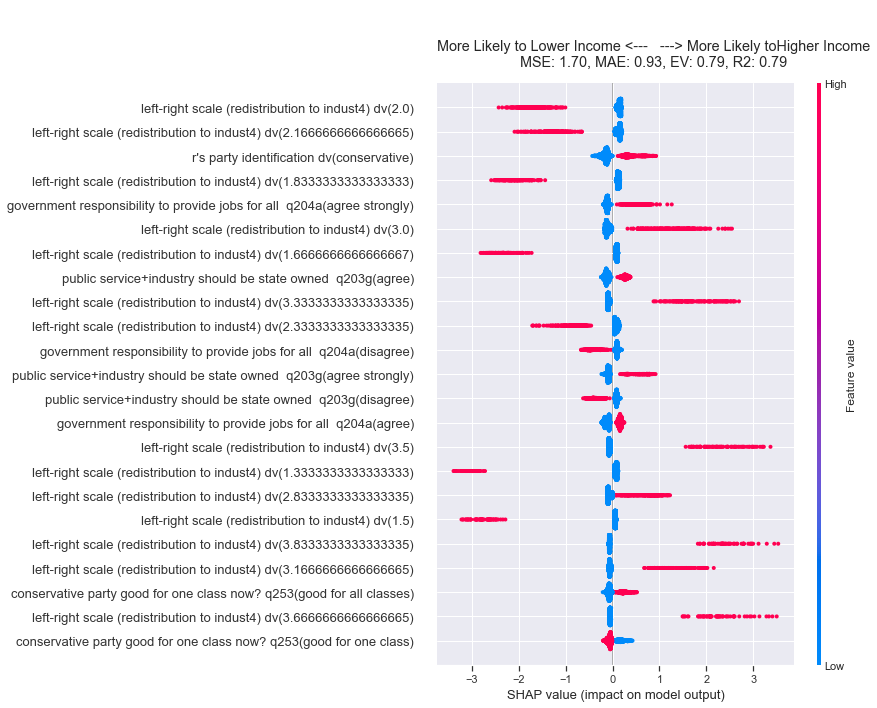

MSE: 5.48, MAE: 1.86, EV: 0.38, R2: 0.38


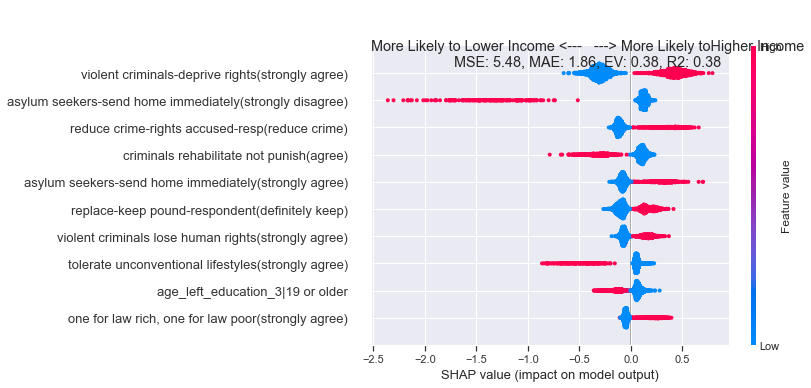

MSE: 4.41, MAE: 1.59, EV: 0.31, R2: 0.31


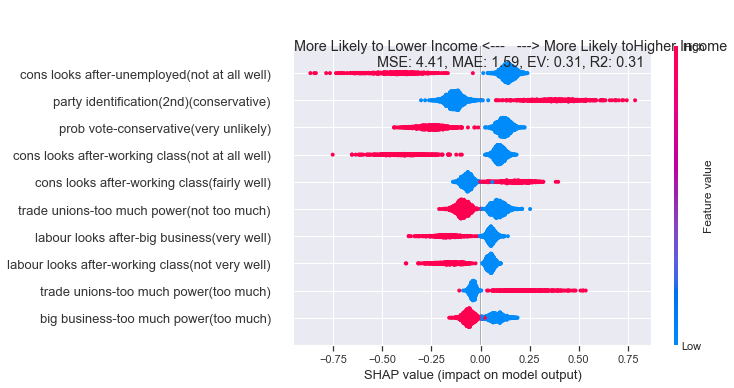

MSE: 4.24, MAE: 1.64, EV: 0.45, R2: 0.45


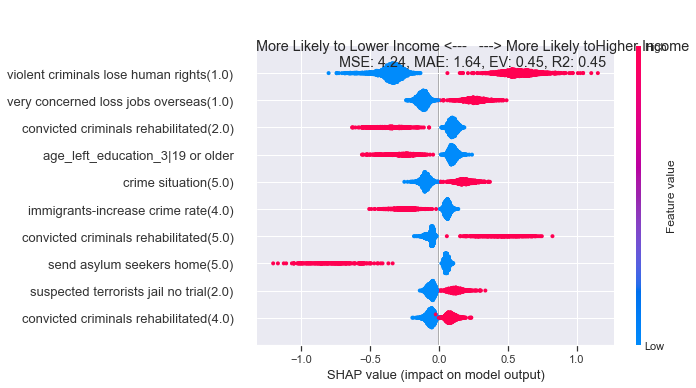

MSE: 3.85, MAE: 1.50, EV: 0.33, R2: 0.33


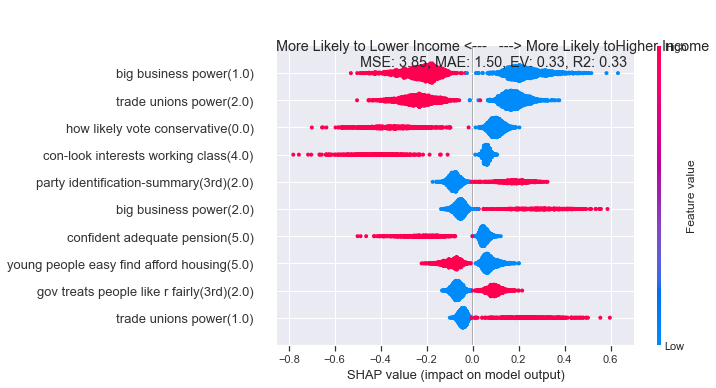

MSE: 5.29, MAE: 1.80, EV: 0.38, R2: 0.38


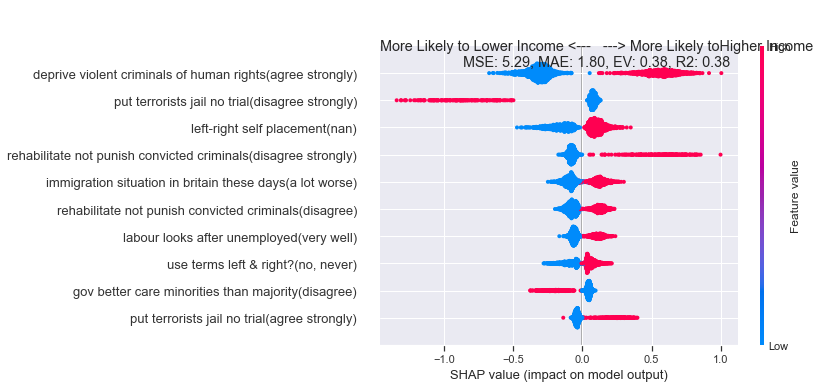

MSE: 3.52, MAE: 1.47, EV: 0.44, R2: 0.44


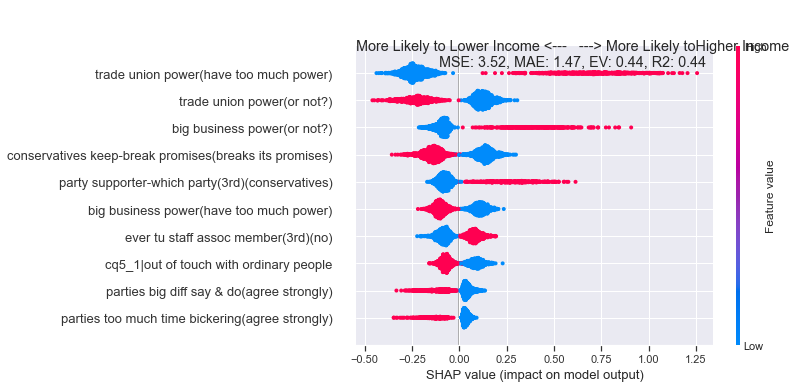

MSE: 10.35, MAE: 2.58, EV: 0.22, R2: 0.22


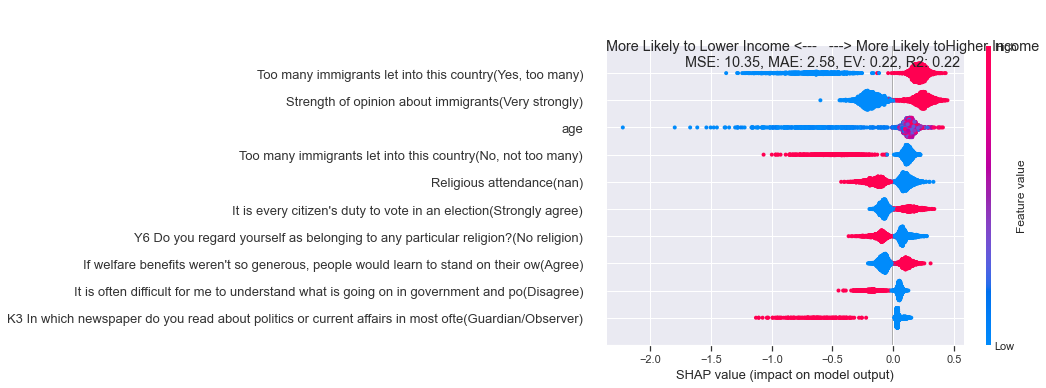

MSE: 5.03, MAE: 1.77, EV: 0.37, R2: 0.37


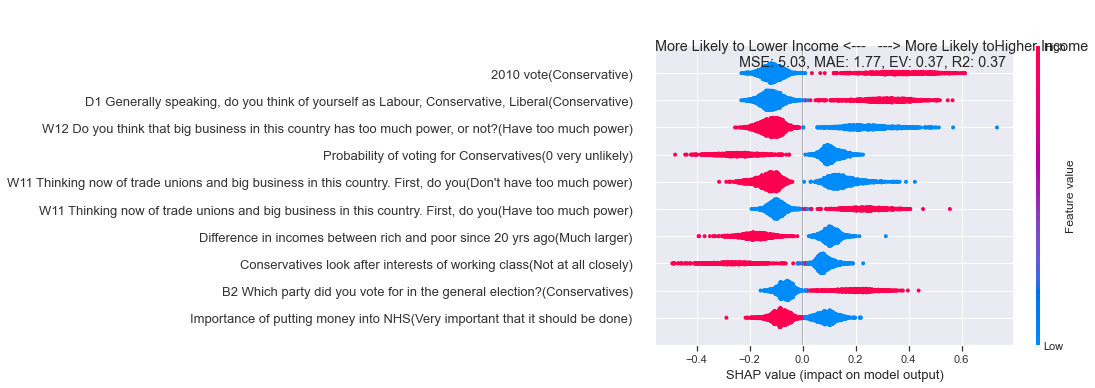

MSE: 6.81, MAE: 2.00, EV: 0.45, R2: 0.45


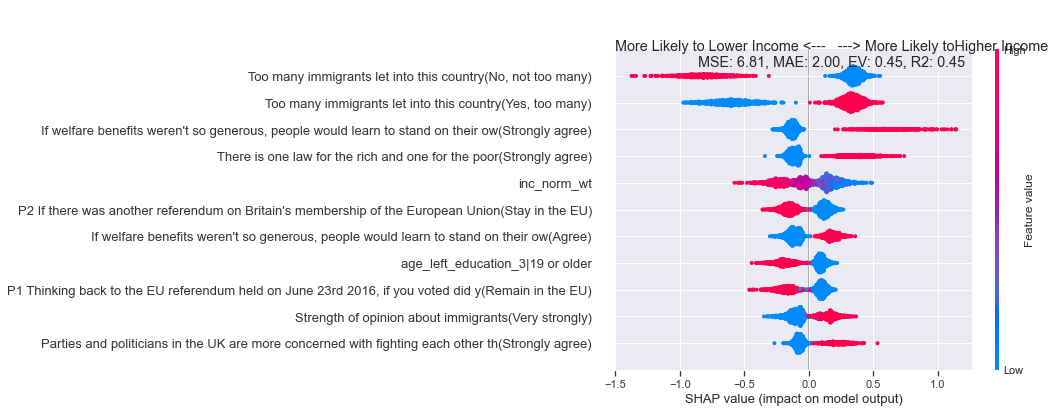

MSE: 5.37, MAE: 1.81, EV: 0.38, R2: 0.38


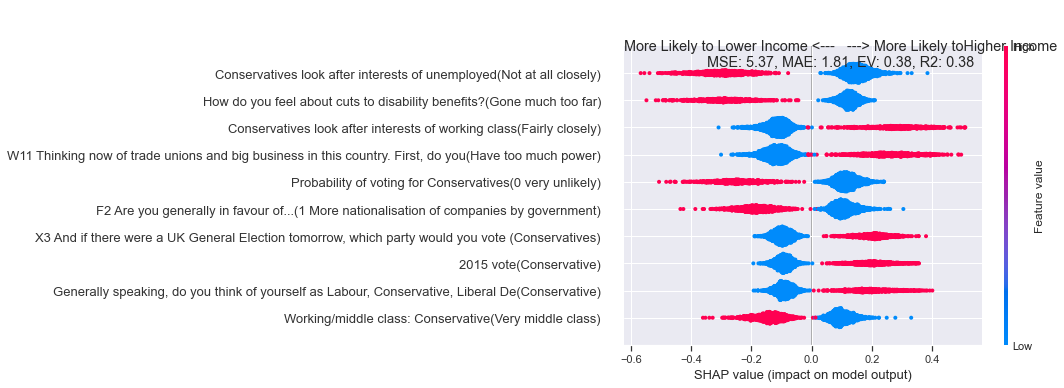

MSE: 6.13, MAE: 1.93, EV: 0.51, R2: 0.51


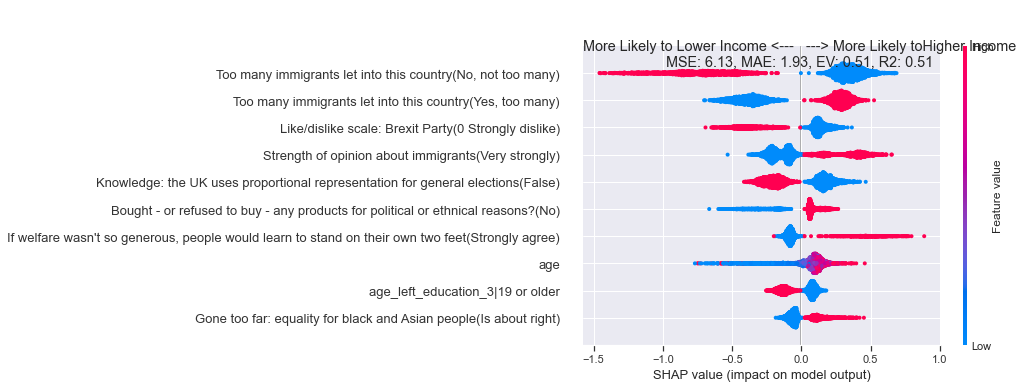

MSE: 4.70, MAE: 1.71, EV: 0.47, R2: 0.47


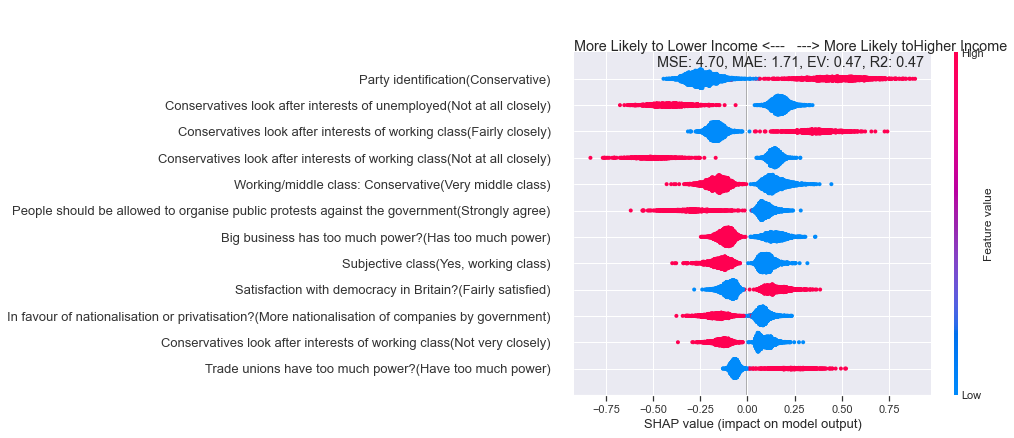

In [36]:
for ge in ['1987','1992', '1997', '2001', '2005', '2010', '2015',
       '2017', '2019']:
    dict_list = death,toughlaw,censorship,respect
    predictions,shap_values,train_columns = run_ge_regression(ge,"soc_lib_auth", demo_var_only=False,
                                                drop_vars=[x[ge] for x in dict_list if ge in x.keys()], get_predictions=True)
    ge_mask = (f2f_harmonised["dataset"]==ge)
    f2f_harmonised.loc[ge_mask&f2f_harmonised["soc_lib_auth"].isnull(),
                       "soc_lib_auth_complete"] = predictions[f2f_harmonised[ge_mask]["soc_lib_auth"].isnull()]
    var_dict[(ge,"soc_lib_auth")]= pd.DataFrame(shap_values,columns=train_columns).abs().mean().sort_values().replace(0,np.nan).dropna().tail(100)
    
    dict_list = ordinary,rich,strongtu,enterprise
    predictions,shap_values,train_columns = run_ge_regression(ge,"ec_left_right", demo_var_only=False,
                                                drop_vars=[x[ge] for x in dict_list if ge in x.keys()], get_predictions=True)
    ge_mask = (f2f_harmonised["dataset"]==ge)
    f2f_harmonised.loc[ge_mask&f2f_harmonised["ec_left_right"].isnull(),
                       "ec_left_right_complete"] = predictions[f2f_harmonised[ge_mask]["ec_left_right"].isnull()]
    var_dict[(ge,"ec_left_right")]= pd.DataFrame(shap_values,columns=train_columns).abs().mean().sort_values().replace(0,np.nan).dropna().tail(100)
    

In [38]:
f2f_harmonised.columns[-50:]

Index(['att_university', 'att_commercial_training',
       'att_polytech_or_techcollege', 'att_night_school',
       'att_non_voc_training', 'att_other', 'att_art_school',
       'att_college_of_commerce', 'att_teacher_training',
       'att_trade_military_apprent', 'att_tech_college_teacher_nursing',
       'att_tech_or_occ_training', 'att_summer_schl_corresp_courses',
       'att_NoFE', 'att_forces_training', 'school_type', 'school_selective',
       'school_fees', 'school_fees_when', 'school_where', 'school_type_2',
       'AuthRight', 'LibLeft', 'CON', 'LAB', 'DNV', 'LD', 'REFUK', 'SNP', 'GP',
       'DK', 'PC', 'decade', 'generation', 'inc_norm', 'inc_norm_wt',
       'inc(quartile)', 'unconventional', 'ordinary', 'rich', 'respect',
       'censorship', 'strongtu', 'enterprise', 'toughlaw', 'death',
       'ec_left_right', 'soc_lib_auth', 'soc_lib_auth_complete',
       'ec_left_right_complete'],
      dtype='object')

In [40]:
f2f_harmonised[['unconventional', 'ordinary', 'rich', 'respect',
       'censorship', 'strongtu', 'enterprise', 'toughlaw', 'death',
       'ec_left_right', 'soc_lib_auth', 'soc_lib_auth_complete',
       'ec_left_right_complete']].to_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_values.zip", compression='zip')

In [35]:
# f2f_harmonised.to_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_values.zip", compression='zip')